### 5. We have seen that we can ft an SVM with a non-linear kernel in order to perform classifcation using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

In [2]:
import numpy as np
import pandas as pd

##### (a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. 

In [3]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

### (b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y-axis.

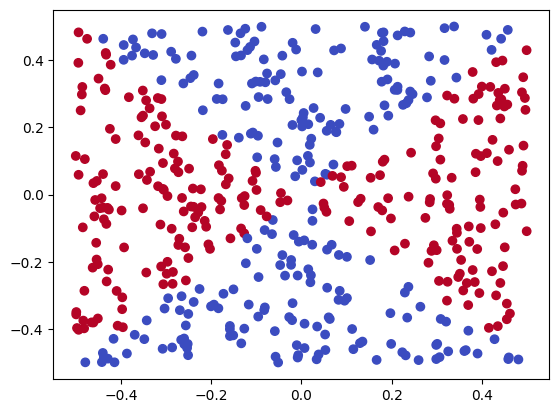

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm)

### (c) Fit a logistic regression model to the data, using X1 and X2 as predictors.

In [5]:
from statsmodels.formula.api import logit
df = pd.DataFrame({'y' : y.astype(int), 'x1' : x1, 'x2' : x2})
model = logit('y ~ x1 + x2', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.692711
         Iterations 3


### (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

In [6]:
predicted = model.predict(df[['x1', 'x2']]) > 0.5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


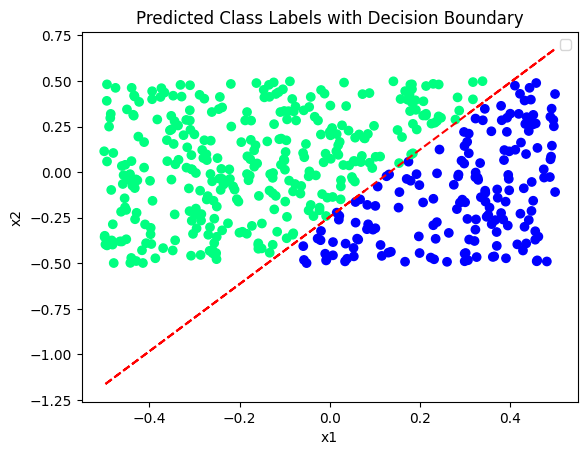

In [7]:
plt.scatter(df['x1'], df['x2'], c=predicted, cmap='winter')
x2_decision_boundary = -(model.params['Intercept'] + model.params['x1'] * df['x1']) / model.params['x2']
plt.plot(df['x1'], x2_decision_boundary, color='r', linestyle='--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Predicted Class Labels with Decision Boundary')
plt.legend()

##### (e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors.

In [8]:
model = logit('y ~ x1 + x2 + I(x1*x2) + I(x1**2)', df).fit()

Optimization terminated successfully.
         Current function value: 0.542568
         Iterations 6


##### (f) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)–(e) until you come up with an example in which the predicted class labels are obviously non-linear.

In [17]:
X = pd.DataFrame({'x1':x1,'x2':x2,'I(x1*x2)':x1*x2,'I(x1**2)':x1**2})

In [18]:
predicted = model.predict(X)

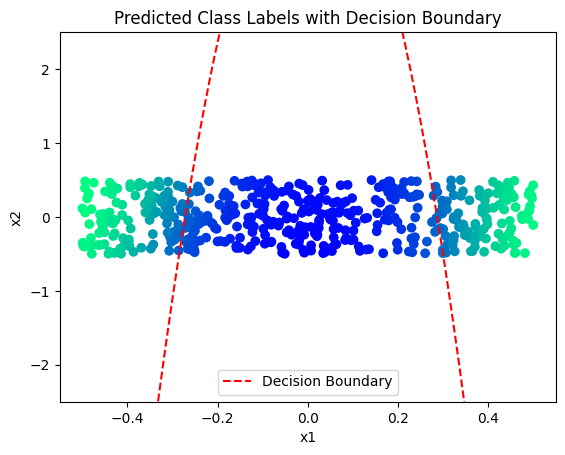

In [31]:
plt.scatter(x1, x2, c=predicted, cmap='winter')
x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 100)
x2_decision_boundary = -(model.params['Intercept'] + model.params['x1'] * x1_range + model.params['I(x1 * x2)'] * x1_range * df['x2'].mean() + model.params['I(x1 ** 2)'] * x1_range ** 2) / model.params['x2']
plt.plot(x1_range, x2_decision_boundary, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Predicted Class Labels with Decision Boundary')
plt.ylim(-2.5,2.5)
plt.legend()

##### (g) Fit a support vector classifer to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

In [54]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=5).fit(df[['x1','x2']], df['y'])

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


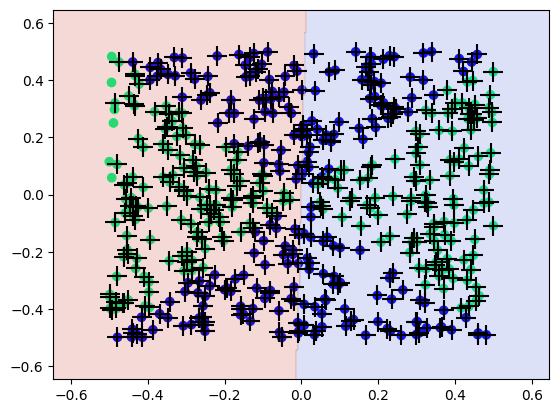

In [57]:
from ISLP.svm import plot
plot(df[['x1','x2']], df['y'], model, scatter_cmap='winter', decision_cmap='coolwarm')

##### (h) Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


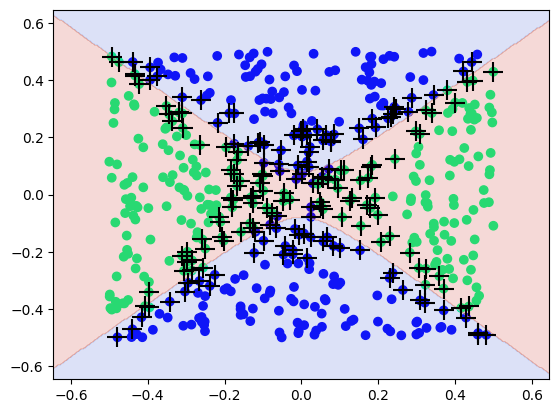

In [66]:
model = SVC(kernel='poly', degree=2, C=10).fit(df[['x1','x2']], df['y'])
plot(df[['x1','x2']],df['y'], model, scatter_cmap='winter', decision_cmap='coolwarm')